In [1]:
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
import math 

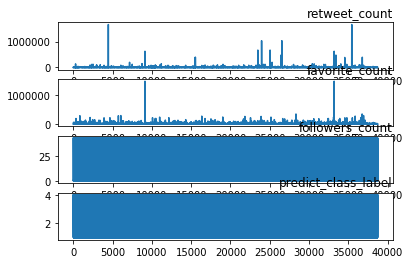

In [13]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('DataSet.csv', header=0, index_col=0)
dataset.values
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=1, loc='right')
    i += 1
pyplot.show()

In [3]:
values[1]

array([0.   , 2.   , 0.136, 2.   ])

In [4]:
print (dataset.head())

                  retweet_count  favorite_count  followers_count  \
date                                                               
12-04-2014 05:44            254             814          43.0000   
10-05-2016 20:41              0               2           0.1360   
26-09-2018 15:10              1               0           0.0364   
22-11-2018 07:47             14               0           1.4300   
07-02-2019 11:31            685               0           0.4350   

                  predict_class_label  
date                                   
12-04-2014 05:44                    4  
10-05-2016 20:41                    2  
26-09-2018 15:10                    4  
22-11-2018 07:47                    4  
07-02-2019 11:31                    1  


In [5]:
import pandas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('DataSet.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,2] = encoder.fit_transform(values[:,2])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7,]], axis=1, inplace=True)
print(reframed.head())

      var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)       var1(t)
1  1.530788e-04   0.000557        1.0   1.000000  0.000000e+00
2  0.000000e+00   0.000001        0.2   0.333333  6.026725e-07
3  6.026725e-07   0.000000        0.0   1.000000  8.437415e-06
4  8.437415e-06   0.000000        0.6   1.000000  4.128307e-04
5  4.128307e-04   0.000000        0.4   0.000000  4.218708e-06


In [6]:
dataset.values

array([[2.540e+02, 8.140e+02, 4.300e+01, 4.000e+00],
       [0.000e+00, 2.000e+00, 1.360e-01, 2.000e+00],
       [1.000e+00, 0.000e+00, 3.640e-02, 4.000e+00],
       ...,
       [1.375e+03, 5.720e+02, 4.300e+01, 2.000e+00],
       [1.200e+01, 0.000e+00, 1.430e+00, 3.000e+00],
       [1.700e+01, 5.300e+01, 1.430e+00, 3.000e+00]])

In [7]:
dataset.head()

,retweet_count,favorite_count,followers_count,predict_class_label
date,,,,
12-04-2014 05:44,254,814,43.0000,4
10-05-2016 20:41,0,2,0.1360,2
26-09-2018 15:10,1,0,0.0364,4
22-11-2018 07:47,14,0,1.4300,4
07-02-2019 11:31,685,0,0.4350,1


In [8]:
# split into train and test sets
values = reframed.values
n_train_hours = 25000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 4) (8760,) (29973, 1, 4) (29973,)


In [9]:
test_X.shape

(29973, 1, 4)

Train on 8760 samples, validate on 29973 samples
Epoch 1/50
 - 3s - loss: 0.0017 - val_loss: 0.0013
Epoch 2/50
 - 0s - loss: 0.0010 - val_loss: 0.0013
Epoch 3/50
 - 0s - loss: 0.0010 - val_loss: 9.6338e-04
Epoch 4/50
 - 0s - loss: 0.0010 - val_loss: 0.0015
Epoch 5/50
 - 0s - loss: 9.6816e-04 - val_loss: 0.0011
Epoch 6/50
 - 0s - loss: 0.0012 - val_loss: 0.0016
Epoch 7/50
 - 0s - loss: 0.0010 - val_loss: 0.0014
Epoch 8/50
 - 0s - loss: 0.0010 - val_loss: 0.0010
Epoch 9/50
 - 0s - loss: 9.8406e-04 - val_loss: 0.0011
Epoch 10/50
 - 0s - loss: 0.0011 - val_loss: 0.0010
Epoch 11/50
 - 0s - loss: 0.0010 - val_loss: 0.0010
Epoch 12/50
 - 0s - loss: 9.7298e-04 - val_loss: 0.0010
Epoch 13/50
 - 0s - loss: 9.7395e-04 - val_loss: 0.0014
Epoch 14/50
 - 0s - loss: 9.7709e-04 - val_loss: 0.0011
Epoch 15/50
 - 0s - loss: 8.7589e-04 - val_loss: 0.0012
Epoch 16/50
 - 1s - loss: 9.7502e-04 - val_loss: 0.0011
Epoch 17/50
 - 0s - loss: 0.0010 - val_loss: 0.0014
Epoch 18/50
 - 0s - loss: 0.0011 - val_loss:

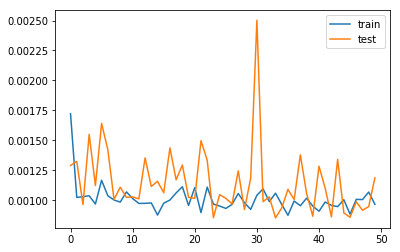

In [10]:
from tensorflow import keras as k
#from keras.utils.visualize_util import plot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
# design network
model = Sequential()

model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
#model.add(Flatten())
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, validation_split=0.33,epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [11]:
# make a prediction

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = pandas.concat((pandas.DataFrame(yhat), pandas.DataFrame(test_X[:, 1:])), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = pandas.concat((pandas.DataFrame(test_y), pandas.DataFrame(test_X[:, 1:])), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 17077.053


In [12]:
'''
Code to randomize data values in csv file 


from pandas import read_csv
from matplotlib import pyplot
dataset = read_csv('ModifiedDataSet.csv', header=0, index_col=0)
dataset.values
ds = dataset.sample(frac=1)
ds.values
ds.to_csv('DataSet.csv')
'''

"\nCode to randomize data values in csv file \n\n\nfrom pandas import read_csv\nfrom matplotlib import pyplot\ndataset = read_csv('ModifiedDataSet.csv', header=0, index_col=0)\ndataset.values\nds = dataset.sample(frac=1)\nds.values\nds.to_csv('DataSet.csv')\n"